In [1]:
data = pd.read_csv("./data.csv")
data.drop(['id','Unnamed: 32'],1,inplace=True)

In [2]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
1,M,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890
2,M,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876
3,M,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730
4,M,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768


In [3]:
data.shape

(569, 31)

In [4]:
data['diagnosis']= data['diagnosis'].apply(lambda x : 1 if x == 'M' else 0)

In [5]:
train = data[:500]
test = data[500:]
target = test['diagnosis']
test.drop(['diagnosis'],1,inplace=True)

# StandardScaler

<AxesSubplot:>

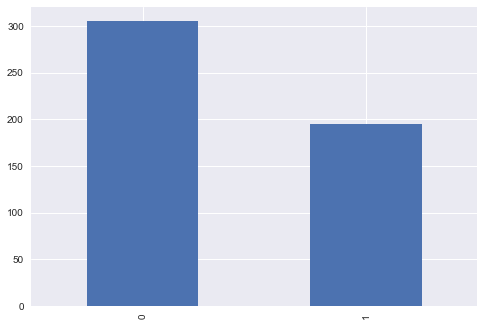

In [6]:
train['diagnosis'].value_counts().plot.bar()

In [7]:
X = train.iloc[:,1: ]
y = train.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier(n_neighbors=3)

model.fit(X_train,y_train)

pred = model.predict(X_test)

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report

roc_auc_score(y_test,pred)

0.9773238380809596

---

위 과정을 pipeline으로 간결하게, 한 번에 작업이 가능합니다.

# PIPELINE

In [8]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scaler',StandardScaler()),
    ('KNN',KNeighborsClassifier(n_neighbors=3))
])

pipe.fit(X_train,y_train)

roc_auc_score(y_test, pipe.predict(X_test))

0.9773238380809596

# Models

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from catboost import CatBoostClassifier

X = train.iloc[:,1: ]
y = train.iloc[:,0]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3, random_state=42)

accuracy=[]
models=[RandomForestClassifier,LogisticRegression,SVC,KNeighborsClassifier,LGBMClassifier,XGBClassifier,CatBoostClassifier]

for i in models:
    clf=i()
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    accuracy.append(accuracy_score(y_test,pred))
    
algorism=['rf_clf','lr_clf','svc','knn','lgbm_clf','xgb_clf','cb_clf']

for i in algorism:
    if i=='rf_clf':
        lr_clf=RandomForestClassifier(random_state=42)
    elif i=='lr_clf':
        rf_clf=LogisticRegression(random_state=42)
    elif i=='svc':
        svc=SVC(kernel='linear',probability=True)
    elif i=='knn':
        knn_clf=KNeighborsClassifier()
    elif i=='cb_clf':
        cb_clf = CatBoostClassifier(random_state=42)
    elif i=='xgb_clf':
        xgb_clf=XGBClassifier(random_state=42)
    else:
        lgbm_clf=LGBMClassifier(random_state=42)

#앙상블!
vot_model=VotingClassifier(estimators=[('RandomForest',rf_clf),('LogisticRegression',lr_clf),('SVC',svc),('KNN',knn_clf),('LGBoost',lgbm_clf),('XGBoost',xgb_clf),('Catboost',cb_clf)],voting='soft')
vot_model.fit(X_train,y_train)
pred2=vot_model.predict(X_test)
accuracy.append(accuracy_score(y_test,pred2))

accuracy_data=pd.DataFrame(accuracy,index=['RandomForestClassifier','LogisticRegression','SVC','KNeighborsClassifier','LGBMClassifier','XGBClassifier','CatboostClassifier','Voting'],columns=['Accuracy'])
accuracy_data

[13:51:30] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.00658
0:	learn: 0.6822826	total: 4.03ms	remaining: 4.02s
1:	learn: 0.6728725	total: 6.17ms	remaining: 3.08s
2:	learn: 0.6634260	total: 8.22ms	remaining: 2.73s
3:	learn: 0.6560777	total: 10.6ms	remaining: 2.64s
4:	learn: 0.6461087	total: 12.6ms	remaining: 2.51s
5:	learn: 0.6383959	total: 14.6ms	remaining: 2.42s
6:	learn: 0.6287276	total: 16.6ms	remaining: 2.35s
7:	learn: 0.6195595	total: 18.8ms	remaining: 2.34s
8:	learn: 0.6088917	total: 21ms	remaining: 2.31s
9:	learn: 0.6004885	total: 23.1ms	remaining: 2.29s
10:	learn: 0.5923762	total: 24.9ms	remaining: 2.24s
11:	learn: 0.5842295	total: 27.4ms	remaining: 2.26s
12:	learn: 0.5759056	total: 29.5ms	remaining: 2.24s
13:	learn: 0.5683703	total: 31.8ms	remaining: 2.24s
14:

165:	learn: 0.1328377	total: 341ms	remaining: 1.71s
166:	learn: 0.1320840	total: 343ms	remaining: 1.71s
167:	learn: 0.1311866	total: 345ms	remaining: 1.71s
168:	learn: 0.1304556	total: 347ms	remaining: 1.7s
169:	learn: 0.1295471	total: 348ms	remaining: 1.7s
170:	learn: 0.1288174	total: 350ms	remaining: 1.7s
171:	learn: 0.1279967	total: 353ms	remaining: 1.7s
172:	learn: 0.1273200	total: 355ms	remaining: 1.7s
173:	learn: 0.1263952	total: 357ms	remaining: 1.7s
174:	learn: 0.1256573	total: 359ms	remaining: 1.69s
175:	learn: 0.1247170	total: 362ms	remaining: 1.69s
176:	learn: 0.1240984	total: 364ms	remaining: 1.69s
177:	learn: 0.1232237	total: 366ms	remaining: 1.69s
178:	learn: 0.1226159	total: 369ms	remaining: 1.69s
179:	learn: 0.1218041	total: 371ms	remaining: 1.69s
180:	learn: 0.1212970	total: 373ms	remaining: 1.69s
181:	learn: 0.1206995	total: 376ms	remaining: 1.69s
182:	learn: 0.1199541	total: 378ms	remaining: 1.69s
183:	learn: 0.1192768	total: 380ms	remaining: 1.69s
184:	learn: 0.1185

360:	learn: 0.0559523	total: 730ms	remaining: 1.29s
361:	learn: 0.0558108	total: 732ms	remaining: 1.29s
362:	learn: 0.0556131	total: 734ms	remaining: 1.29s
363:	learn: 0.0554224	total: 736ms	remaining: 1.28s
364:	learn: 0.0552681	total: 738ms	remaining: 1.28s
365:	learn: 0.0550967	total: 740ms	remaining: 1.28s
366:	learn: 0.0548683	total: 742ms	remaining: 1.28s
367:	learn: 0.0547701	total: 744ms	remaining: 1.28s
368:	learn: 0.0546441	total: 746ms	remaining: 1.27s
369:	learn: 0.0545106	total: 748ms	remaining: 1.27s
370:	learn: 0.0543026	total: 750ms	remaining: 1.27s
371:	learn: 0.0541492	total: 752ms	remaining: 1.27s
372:	learn: 0.0539372	total: 755ms	remaining: 1.27s
373:	learn: 0.0538057	total: 757ms	remaining: 1.27s
374:	learn: 0.0536050	total: 759ms	remaining: 1.26s
375:	learn: 0.0533587	total: 761ms	remaining: 1.26s
376:	learn: 0.0531912	total: 763ms	remaining: 1.26s
377:	learn: 0.0530078	total: 764ms	remaining: 1.26s
378:	learn: 0.0528026	total: 766ms	remaining: 1.25s
379:	learn: 

562:	learn: 0.0317656	total: 1.12s	remaining: 869ms
563:	learn: 0.0316873	total: 1.12s	remaining: 867ms
564:	learn: 0.0316235	total: 1.12s	remaining: 865ms
565:	learn: 0.0315522	total: 1.13s	remaining: 864ms
566:	learn: 0.0314622	total: 1.13s	remaining: 861ms
567:	learn: 0.0314100	total: 1.13s	remaining: 860ms
568:	learn: 0.0313418	total: 1.13s	remaining: 858ms
569:	learn: 0.0312525	total: 1.13s	remaining: 856ms
570:	learn: 0.0311634	total: 1.14s	remaining: 854ms
571:	learn: 0.0310751	total: 1.14s	remaining: 852ms
572:	learn: 0.0310074	total: 1.14s	remaining: 850ms
573:	learn: 0.0309445	total: 1.14s	remaining: 849ms
574:	learn: 0.0308500	total: 1.15s	remaining: 847ms
575:	learn: 0.0308011	total: 1.15s	remaining: 845ms
576:	learn: 0.0307554	total: 1.15s	remaining: 844ms
577:	learn: 0.0306612	total: 1.15s	remaining: 841ms
578:	learn: 0.0305795	total: 1.16s	remaining: 840ms
579:	learn: 0.0305238	total: 1.16s	remaining: 838ms
580:	learn: 0.0304308	total: 1.16s	remaining: 836ms
581:	learn: 

755:	learn: 0.0208998	total: 1.51s	remaining: 487ms
756:	learn: 0.0208680	total: 1.51s	remaining: 485ms
757:	learn: 0.0208314	total: 1.51s	remaining: 483ms
758:	learn: 0.0207840	total: 1.51s	remaining: 481ms
759:	learn: 0.0207505	total: 1.52s	remaining: 479ms
760:	learn: 0.0207091	total: 1.52s	remaining: 477ms
761:	learn: 0.0206630	total: 1.52s	remaining: 475ms
762:	learn: 0.0206251	total: 1.52s	remaining: 473ms
763:	learn: 0.0206050	total: 1.53s	remaining: 471ms
764:	learn: 0.0205667	total: 1.53s	remaining: 470ms
765:	learn: 0.0205449	total: 1.53s	remaining: 468ms
766:	learn: 0.0204933	total: 1.53s	remaining: 466ms
767:	learn: 0.0204504	total: 1.53s	remaining: 464ms
768:	learn: 0.0203985	total: 1.54s	remaining: 462ms
769:	learn: 0.0203510	total: 1.54s	remaining: 460ms
770:	learn: 0.0203013	total: 1.54s	remaining: 458ms
771:	learn: 0.0202542	total: 1.54s	remaining: 456ms
772:	learn: 0.0201982	total: 1.54s	remaining: 454ms
773:	learn: 0.0201620	total: 1.55s	remaining: 452ms
774:	learn: 

952:	learn: 0.0146066	total: 1.9s	remaining: 93.7ms
953:	learn: 0.0145748	total: 1.9s	remaining: 91.7ms
954:	learn: 0.0145556	total: 1.9s	remaining: 89.7ms
955:	learn: 0.0145245	total: 1.91s	remaining: 87.7ms
956:	learn: 0.0145217	total: 1.91s	remaining: 85.7ms
957:	learn: 0.0144849	total: 1.91s	remaining: 83.7ms
958:	learn: 0.0144565	total: 1.91s	remaining: 81.8ms
959:	learn: 0.0144141	total: 1.91s	remaining: 79.8ms
960:	learn: 0.0143892	total: 1.92s	remaining: 77.8ms
961:	learn: 0.0143713	total: 1.92s	remaining: 75.8ms
962:	learn: 0.0143437	total: 1.92s	remaining: 73.8ms
963:	learn: 0.0143144	total: 1.92s	remaining: 71.8ms
964:	learn: 0.0142930	total: 1.93s	remaining: 69.8ms
965:	learn: 0.0142778	total: 1.93s	remaining: 67.8ms
966:	learn: 0.0142749	total: 1.93s	remaining: 65.9ms
967:	learn: 0.0142726	total: 1.93s	remaining: 63.9ms
968:	learn: 0.0142529	total: 1.93s	remaining: 61.9ms
969:	learn: 0.0142269	total: 1.94s	remaining: 59.9ms
970:	learn: 0.0142065	total: 1.94s	remaining: 57.

168:	learn: 0.1308746	total: 348ms	remaining: 1.71s
169:	learn: 0.1300255	total: 350ms	remaining: 1.71s
170:	learn: 0.1293718	total: 352ms	remaining: 1.71s
171:	learn: 0.1283929	total: 354ms	remaining: 1.7s
172:	learn: 0.1276476	total: 356ms	remaining: 1.7s
173:	learn: 0.1268714	total: 358ms	remaining: 1.7s
174:	learn: 0.1261878	total: 361ms	remaining: 1.7s
175:	learn: 0.1255441	total: 363ms	remaining: 1.7s
176:	learn: 0.1247294	total: 365ms	remaining: 1.7s
177:	learn: 0.1240515	total: 367ms	remaining: 1.7s
178:	learn: 0.1235366	total: 370ms	remaining: 1.7s
179:	learn: 0.1229883	total: 372ms	remaining: 1.69s
180:	learn: 0.1221066	total: 375ms	remaining: 1.7s
181:	learn: 0.1215900	total: 377ms	remaining: 1.69s
182:	learn: 0.1210578	total: 379ms	remaining: 1.69s
183:	learn: 0.1202527	total: 381ms	remaining: 1.69s
184:	learn: 0.1194455	total: 383ms	remaining: 1.69s
185:	learn: 0.1187763	total: 385ms	remaining: 1.68s
186:	learn: 0.1181184	total: 387ms	remaining: 1.68s
187:	learn: 0.1174063

365:	learn: 0.0540411	total: 739ms	remaining: 1.28s
366:	learn: 0.0538481	total: 741ms	remaining: 1.28s
367:	learn: 0.0536491	total: 743ms	remaining: 1.27s
368:	learn: 0.0534975	total: 745ms	remaining: 1.27s
369:	learn: 0.0533630	total: 747ms	remaining: 1.27s
370:	learn: 0.0530901	total: 748ms	remaining: 1.27s
371:	learn: 0.0529961	total: 751ms	remaining: 1.27s
372:	learn: 0.0528376	total: 753ms	remaining: 1.26s
373:	learn: 0.0525870	total: 755ms	remaining: 1.26s
374:	learn: 0.0524876	total: 757ms	remaining: 1.26s
375:	learn: 0.0522700	total: 760ms	remaining: 1.26s
376:	learn: 0.0521280	total: 762ms	remaining: 1.26s
377:	learn: 0.0519570	total: 764ms	remaining: 1.26s
378:	learn: 0.0518307	total: 766ms	remaining: 1.25s
379:	learn: 0.0516509	total: 768ms	remaining: 1.25s
380:	learn: 0.0514342	total: 770ms	remaining: 1.25s
381:	learn: 0.0513291	total: 772ms	remaining: 1.25s
382:	learn: 0.0511829	total: 774ms	remaining: 1.25s
383:	learn: 0.0510313	total: 776ms	remaining: 1.24s
384:	learn: 

563:	learn: 0.0312698	total: 1.13s	remaining: 872ms
564:	learn: 0.0311924	total: 1.13s	remaining: 870ms
565:	learn: 0.0311239	total: 1.13s	remaining: 869ms
566:	learn: 0.0310586	total: 1.13s	remaining: 866ms
567:	learn: 0.0310381	total: 1.14s	remaining: 864ms
568:	learn: 0.0309823	total: 1.14s	remaining: 862ms
569:	learn: 0.0308850	total: 1.14s	remaining: 861ms
570:	learn: 0.0307993	total: 1.14s	remaining: 859ms
571:	learn: 0.0306905	total: 1.15s	remaining: 857ms
572:	learn: 0.0306008	total: 1.15s	remaining: 856ms
573:	learn: 0.0305591	total: 1.15s	remaining: 854ms
574:	learn: 0.0304442	total: 1.15s	remaining: 852ms
575:	learn: 0.0303784	total: 1.16s	remaining: 850ms
576:	learn: 0.0303107	total: 1.16s	remaining: 848ms
577:	learn: 0.0302509	total: 1.16s	remaining: 846ms
578:	learn: 0.0302069	total: 1.16s	remaining: 844ms
579:	learn: 0.0301020	total: 1.16s	remaining: 842ms
580:	learn: 0.0300461	total: 1.17s	remaining: 840ms
581:	learn: 0.0299834	total: 1.17s	remaining: 838ms
582:	learn: 

757:	learn: 0.0206528	total: 1.52s	remaining: 484ms
758:	learn: 0.0206218	total: 1.52s	remaining: 482ms
759:	learn: 0.0205740	total: 1.52s	remaining: 480ms
760:	learn: 0.0205463	total: 1.52s	remaining: 478ms
761:	learn: 0.0205111	total: 1.52s	remaining: 476ms
762:	learn: 0.0204620	total: 1.52s	remaining: 474ms
763:	learn: 0.0204135	total: 1.53s	remaining: 472ms
764:	learn: 0.0203635	total: 1.53s	remaining: 470ms
765:	learn: 0.0203345	total: 1.53s	remaining: 468ms
766:	learn: 0.0202745	total: 1.53s	remaining: 466ms
767:	learn: 0.0202548	total: 1.54s	remaining: 464ms
768:	learn: 0.0202098	total: 1.54s	remaining: 462ms
769:	learn: 0.0201809	total: 1.54s	remaining: 461ms
770:	learn: 0.0201346	total: 1.54s	remaining: 459ms
771:	learn: 0.0200934	total: 1.55s	remaining: 457ms
772:	learn: 0.0200536	total: 1.55s	remaining: 455ms
773:	learn: 0.0200093	total: 1.55s	remaining: 453ms
774:	learn: 0.0199570	total: 1.55s	remaining: 451ms
775:	learn: 0.0199176	total: 1.55s	remaining: 449ms
776:	learn: 

950:	learn: 0.0146631	total: 1.91s	remaining: 98.2ms
951:	learn: 0.0146599	total: 1.91s	remaining: 96.2ms
952:	learn: 0.0146233	total: 1.91s	remaining: 94.2ms
953:	learn: 0.0145971	total: 1.91s	remaining: 92.2ms
954:	learn: 0.0145814	total: 1.91s	remaining: 90.2ms
955:	learn: 0.0145588	total: 1.92s	remaining: 88.2ms
956:	learn: 0.0145538	total: 1.92s	remaining: 86.2ms
957:	learn: 0.0145401	total: 1.92s	remaining: 84.2ms
958:	learn: 0.0145131	total: 1.92s	remaining: 82.2ms
959:	learn: 0.0144871	total: 1.93s	remaining: 80.3ms
960:	learn: 0.0144568	total: 1.93s	remaining: 78.3ms
961:	learn: 0.0144294	total: 1.93s	remaining: 76.2ms
962:	learn: 0.0143908	total: 1.93s	remaining: 74.2ms
963:	learn: 0.0143657	total: 1.93s	remaining: 72.2ms
964:	learn: 0.0143476	total: 1.94s	remaining: 70.2ms
965:	learn: 0.0143105	total: 1.94s	remaining: 68.2ms
966:	learn: 0.0142885	total: 1.94s	remaining: 66.2ms
967:	learn: 0.0142654	total: 1.94s	remaining: 64.2ms
968:	learn: 0.0142342	total: 1.94s	remaining: 

,Accuracy
RandomForestClassifier,0.9733
LogisticRegression,0.9333
SVC,0.9200
KNeighborsClassifier,0.9467
LGBMClassifier,0.9733
XGBClassifier,0.9733
CatboostClassifier,0.9800
Voting,0.9800


**CatBoost는 학습률과 같은 튜닝을 알아서 해주기 때문에 하지 않겠습니다**

그래서, LGBM으로 작업을 하겠습니다.

In [10]:
#사용할 모델 정의
model = LGBMClassifier(random_state=42,)

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[50,100,200],
    'min_child_samples':[10,20,30],
    'max_depth':[3,5,7,10,12],
    'learning_rate':[1,0.1,0.05,0.01,0.001]
}

# GridSearchCV

GridSearchCV는 params의 값들을 모두 조합하여 최적의 하이파라미터튜닝을 합니다.  
**데이터셋이 작은 경우에 사용해주는 것이 좋습니다**

In [11]:
gs = GridSearchCV(estimator=model, param_grid= params, n_jobs=-1,cv=5,scoring='accuracy')

gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [1, 0.1, 0.05, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 10, 12],
                         'min_child_samples': [10, 20, 30],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [12]:
#그래서 최적의 튜닝은?
gs.best_params_

{'learning_rate': 0.1,
 'max_depth': 10,
 'min_child_samples': 20,
 'n_estimators': 200}

In [13]:
pred = gs.predict(X_test)
accuracy_score(y_test,pred)

0.98

하이퍼파라미터 튜닝으로 점수가 상승했습니다.  

아래는 위에서 보았던 None Tuning LGBMClassifier의 정확도, 0.9733입니다.

<div>
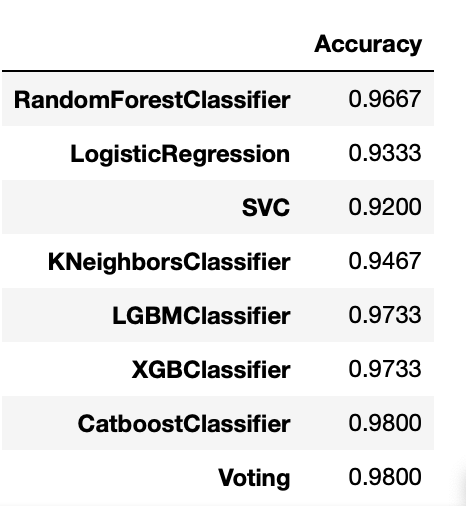
</div>

# RandomizedSearchCV

RandomizedSearchCV는 데이터셋이 큰 경우에 사용하기 적합합니다.  
params의 값들을 랜덤으로 조합하여 최적의 점수를 만드려 노력합니다.

In [14]:
rs = RandomizedSearchCV(estimator=model,param_distributions=params,cv=5,n_jobs=-1,scoring='accuracy')

rs.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(random_state=42), n_jobs=-1,
                   param_distributions={'learning_rate': [1, 0.1, 0.05, 0.01,
                                                          0.001],
                                        'max_depth': [3, 5, 7, 10, 12],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [50, 100, 200]},
                   scoring='accuracy')

**RandomizedSearchCV를 실행해보면 GridSerachCV보다 빠르게 끝납니다.**

In [15]:
#그래서 최적의 파라미터는?
rs.best_params_

{'n_estimators': 100,
 'min_child_samples': 30,
 'max_depth': 5,
 'learning_rate': 0.05}

In [16]:
pred = rs.predict(X_test)
accuracy_score(y_test,pred)

0.9666666666666667

점수가 그대로군요.

**Obseravation**

* 자원 소모를 최소화하기 위해 데이터셋이 작은 경우 ```GridSearch```를 진행하고 큰 경우에는 ```RandomizedSearch```를 진행합니다.

**그럼, RandomizedSearch를 먼저 진행해서 그 근처에 있는 값들을 GridSerach 작업을 해주면 되지 않을까요?**

그래서 우리는 ```Optuna```에 대해 알아봅시다.

# Optuna

**Optuna**는 AutoHyperparameter Tuning입니다.

In [17]:
from optuna.samplers import TPESampler

#Oputna는 함수정의는 필수입니다.
def objectiveLGBM(trial: Trial, X,y,test):
    param = {
        'objective':'binary',
        'metric':'accuracy',
        'verbosity':-1,
        'boosting_type':'gbdt',
        'lambda_l1':trial.suggest_loguniform('lambda_l1',1e-8, 10.0),
        'lambda_l2':trial.suggest_loguniform('lambda_l2',1e-8, 10.0),
        'num_leaves':trial.suggest_int('num_leaves',2,512),
        'learning_rate':0.01,
        'n_estimators':trial.suggest_int('n_estimators',700,3000),
        'feature_fraction':trial.suggest_uniform('feature_fraction',0.4,1.0),
        'bagging_fraction':trial.suggest_uniform('bagging_fraction',0.4,1.0),
        'bagging_freq':trial.suggest_int('min_child_samples',5,100),
        'gpu_use_dp':True
    }
#     X_train,X_test,y_train,y_test =train_test_split(X,y, test_size=.3)
    
    lgbm_clf= LGBMClassifier(**param) #딕셔너리와 함수 매개변수를 매칭시키기 위해서 **를 사용해줍니다.
    lgbm_clf=lgbm_clf.fit(X_train,y_train,verbose=False)
    
    score=accuracy_score(y_test,lgbm_clf.predict(X_test))
    return score

study= optuna.create_study(direction='maximize',sampler=TPESampler())
study.optimize(lambda trial: objectiveLGBM(trial,X,y,X_test), n_trials=20)
print()
print("Best Trial : score {}, \nparams {}".format(study.best_trial.value, study.best_trial.params))

[I 2022-06-09 13:12:35,585] A new study created in memory with name: no-name-6a5656f5-82b2-4115-8683-65b9da1b9a5a


[LightGBM] [Warning] feature_fraction is set=0.7550676946617381, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7550676946617381
[LightGBM] [Warning] lambda_l1 is set=5.863499556188259, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.863499556188259
[LightGBM] [Warning] bagging_fraction is set=0.6678604291667368, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6678604291667368
[LightGBM] [Warning] lambda_l2 is set=0.0005542947890576611, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0005542947890576611
[LightGBM] [Warning] bagging_freq is set=48, subsample_freq=0 will be ignored. Current value: bagging_freq=48


[I 2022-06-09 13:12:35,906] Trial 0 finished with value: 0.96 and parameters: {'lambda_l1': 5.863499556188259, 'lambda_l2': 0.0005542947890576611, 'num_leaves': 181, 'n_estimators': 1976, 'feature_fraction': 0.7550676946617381, 'bagging_fraction': 0.6678604291667368, 'min_child_samples': 48}. Best is trial 0 with value: 0.96.


[LightGBM] [Warning] feature_fraction is set=0.5511446774693695, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5511446774693695
[LightGBM] [Warning] lambda_l1 is set=0.012646989739195926, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012646989739195926
[LightGBM] [Warning] bagging_fraction is set=0.7925557788549262, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7925557788549262
[LightGBM] [Warning] lambda_l2 is set=1.6505741211113213e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.6505741211113213e-06
[LightGBM] [Warning] bagging_freq is set=19, subsample_freq=0 will be ignored. Current value: bagging_freq=19


[I 2022-06-09 13:12:36,537] Trial 1 finished with value: 0.98 and parameters: {'lambda_l1': 0.012646989739195926, 'lambda_l2': 1.6505741211113213e-06, 'num_leaves': 305, 'n_estimators': 1938, 'feature_fraction': 0.5511446774693695, 'bagging_fraction': 0.7925557788549262, 'min_child_samples': 19}. Best is trial 1 with value: 0.98.


[LightGBM] [Warning] feature_fraction is set=0.6579710820453142, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6579710820453142
[LightGBM] [Warning] lambda_l1 is set=0.0005830758138404658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005830758138404658
[LightGBM] [Warning] bagging_fraction is set=0.7135716476139702, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7135716476139702
[LightGBM] [Warning] lambda_l2 is set=3.754538278220935, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.754538278220935
[LightGBM] [Warning] bagging_freq is set=40, subsample_freq=0 will be ignored. Current value: bagging_freq=40


[I 2022-06-09 13:12:37,346] Trial 2 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 0.0005830758138404658, 'lambda_l2': 3.754538278220935, 'num_leaves': 70, 'n_estimators': 2007, 'feature_fraction': 0.6579710820453142, 'bagging_fraction': 0.7135716476139702, 'min_child_samples': 40}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.7674481909916597, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7674481909916597
[LightGBM] [Warning] lambda_l1 is set=4.1027042133464924e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.1027042133464924e-08
[LightGBM] [Warning] bagging_fraction is set=0.613184902848048, subsample=1.0 will be ignored. Current value: bagging_fraction=0.613184902848048
[LightGBM] [Warning] lambda_l2 is set=1.97616042448901e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.97616042448901e-08
[LightGBM] [Warning] bagging_freq is set=64, subsample_freq=0 will be ignored. Current value: bagging_freq=64


[I 2022-06-09 13:12:37,602] Trial 3 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 4.1027042133464924e-08, 'lambda_l2': 1.97616042448901e-08, 'num_leaves': 110, 'n_estimators': 758, 'feature_fraction': 0.7674481909916597, 'bagging_fraction': 0.613184902848048, 'min_child_samples': 64}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.6162134108534365, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6162134108534365
[LightGBM] [Warning] lambda_l1 is set=0.4654448877274014, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4654448877274014
[LightGBM] [Warning] bagging_fraction is set=0.7565310447192475, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7565310447192475
[LightGBM] [Warning] lambda_l2 is set=0.002778833526992799, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.002778833526992799
[LightGBM] [Warning] bagging_freq is set=66, subsample_freq=0 will be ignored. Current value: bagging_freq=66


[I 2022-06-09 13:12:37,858] Trial 4 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 0.4654448877274014, 'lambda_l2': 0.002778833526992799, 'num_leaves': 262, 'n_estimators': 1136, 'feature_fraction': 0.6162134108534365, 'bagging_fraction': 0.7565310447192475, 'min_child_samples': 66}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.7019251158541239, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7019251158541239
[LightGBM] [Warning] lambda_l1 is set=0.0009487557184893762, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009487557184893762
[LightGBM] [Warning] bagging_fraction is set=0.891795372347985, subsample=1.0 will be ignored. Current value: bagging_fraction=0.891795372347985
[LightGBM] [Warning] lambda_l2 is set=2.8571179633509986e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8571179633509986e-08
[LightGBM] [Warning] bagging_freq is set=72, subsample_freq=0 will be ignored. Current value: bagging_freq=72


[I 2022-06-09 13:12:38,625] Trial 5 finished with value: 0.98 and parameters: {'lambda_l1': 0.0009487557184893762, 'lambda_l2': 2.8571179633509986e-08, 'num_leaves': 266, 'n_estimators': 2094, 'feature_fraction': 0.7019251158541239, 'bagging_fraction': 0.891795372347985, 'min_child_samples': 72}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.6983346466850465, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6983346466850465
[LightGBM] [Warning] lambda_l1 is set=2.1475348175070096e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.1475348175070096e-07
[LightGBM] [Warning] bagging_fraction is set=0.9319331151738002, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9319331151738002
[LightGBM] [Warning] lambda_l2 is set=1.4213416256282208e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4213416256282208e-08
[LightGBM] [Warning] bagging_freq is set=49, subsample_freq=0 will be ignored. Current value: bagging_freq=49


[I 2022-06-09 13:12:39,285] Trial 6 finished with value: 0.9666666666666667 and parameters: {'lambda_l1': 2.1475348175070096e-07, 'lambda_l2': 1.4213416256282208e-08, 'num_leaves': 324, 'n_estimators': 1274, 'feature_fraction': 0.6983346466850465, 'bagging_fraction': 0.9319331151738002, 'min_child_samples': 49}. Best is trial 2 with value: 0.9866666666666667.
[I 2022-06-09 13:12:39,471] Trial 7 finished with value: 0.98 and parameters: {'lambda_l1': 0.01866578309942005, 'lambda_l2': 4.738452870277947, 'num_leaves': 39, 'n_estimators': 702, 'feature_fraction': 0.9244105327901898, 'bagging_fraction': 0.9176176781778298, 'min_child_samples': 73}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.9244105327901898, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9244105327901898
[LightGBM] [Warning] lambda_l1 is set=0.01866578309942005, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01866578309942005
[LightGBM] [Warning] bagging_fraction is set=0.9176176781778298, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9176176781778298
[LightGBM] [Warning] lambda_l2 is set=4.738452870277947, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.738452870277947
[LightGBM] [Warning] bagging_freq is set=73, subsample_freq=0 will be ignored. Current value: bagging_freq=73
[LightGBM] [Warning] feature_fraction is set=0.5660068982361754, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5660068982361754
[LightGBM] [Warning] lambda_l1 is set=0.016758006127352117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.016758006127352117
[LightGBM] [Warning] bagging_fr

[I 2022-06-09 13:12:39,736] Trial 8 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 0.016758006127352117, 'lambda_l2': 6.187235961451971e-05, 'num_leaves': 7, 'n_estimators': 722, 'feature_fraction': 0.5660068982361754, 'bagging_fraction': 0.9730604737847424, 'min_child_samples': 61}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.8268464045159942, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8268464045159942
[LightGBM] [Warning] lambda_l1 is set=0.011410260453991124, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.011410260453991124
[LightGBM] [Warning] bagging_fraction is set=0.45233191419590557, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45233191419590557
[LightGBM] [Warning] lambda_l2 is set=8.214445180485791e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.214445180485791e-05
[LightGBM] [Warning] bagging_freq is set=62, subsample_freq=0 will be ignored. Current value: bagging_freq=62


[I 2022-06-09 13:12:40,129] Trial 9 finished with value: 0.98 and parameters: {'lambda_l1': 0.011410260453991124, 'lambda_l2': 8.214445180485791e-05, 'num_leaves': 465, 'n_estimators': 1688, 'feature_fraction': 0.8268464045159942, 'bagging_fraction': 0.45233191419590557, 'min_child_samples': 62}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.4009395560135105, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4009395560135105
[LightGBM] [Warning] lambda_l1 is set=7.183482647672878e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.183482647672878e-06
[LightGBM] [Warning] bagging_fraction is set=0.5454745717831367, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5454745717831367
[LightGBM] [Warning] lambda_l2 is set=9.781807571271475, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.781807571271475
[LightGBM] [Warning] bagging_freq is set=100, subsample_freq=0 will be ignored. Current value: bagging_freq=100


[I 2022-06-09 13:12:40,646] Trial 10 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 7.183482647672878e-06, 'lambda_l2': 9.781807571271475, 'num_leaves': 142, 'n_estimators': 2852, 'feature_fraction': 0.4009395560135105, 'bagging_fraction': 0.5454745717831367, 'min_child_samples': 100}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.5892559504128325, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5892559504128325
[LightGBM] [Warning] lambda_l1 is set=7.285609363754012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.285609363754012
[LightGBM] [Warning] bagging_fraction is set=0.7789777998849612, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7789777998849612
[LightGBM] [Warning] lambda_l2 is set=0.0619397485254441, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0619397485254441
[LightGBM] [Warning] bagging_freq is set=26, subsample_freq=0 will be ignored. Current value: bagging_freq=26


[I 2022-06-09 13:12:40,966] Trial 11 finished with value: 0.96 and parameters: {'lambda_l1': 7.285609363754012, 'lambda_l2': 0.0619397485254441, 'num_leaves': 383, 'n_estimators': 2388, 'feature_fraction': 0.5892559504128325, 'bagging_fraction': 0.7789777998849612, 'min_child_samples': 26}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.4610151071607109, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4610151071607109
[LightGBM] [Warning] lambda_l1 is set=2.7189363445856893e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7189363445856893e-05
[LightGBM] [Warning] bagging_fraction is set=0.7681544237561416, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7681544237561416
[LightGBM] [Warning] lambda_l2 is set=0.045156057783544735, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.045156057783544735
[LightGBM] [Warning] bagging_freq is set=35, subsample_freq=0 will be ignored. Current value: bagging_freq=35


[I 2022-06-09 13:12:41,342] Trial 12 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 2.7189363445856893e-05, 'lambda_l2': 0.045156057783544735, 'num_leaves': 205, 'n_estimators': 1425, 'feature_fraction': 0.4610151071607109, 'bagging_fraction': 0.7681544237561416, 'min_child_samples': 35}. Best is trial 2 with value: 0.9866666666666667.
[I 2022-06-09 13:12:41,537] Trial 13 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 1.4843944119900436, 'lambda_l2': 0.08447772115396487, 'num_leaves': 78, 'n_estimators': 1264, 'feature_fraction': 0.6462788374349998, 'bagging_fraction': 0.7052803988595597, 'min_child_samples': 5}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.6462788374349998, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6462788374349998
[LightGBM] [Warning] lambda_l1 is set=1.4843944119900436, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4843944119900436
[LightGBM] [Warning] bagging_fraction is set=0.7052803988595597, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7052803988595597
[LightGBM] [Warning] lambda_l2 is set=0.08447772115396487, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.08447772115396487
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.5058933701357176, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5058933701357176
[LightGBM] [Warning] lambda_l1 is set=0.2467747955335506, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.2467747955335506
[LightGBM] [Warning] bagging_fracti

[I 2022-06-09 13:12:41,962] Trial 14 finished with value: 0.98 and parameters: {'lambda_l1': 0.2467747955335506, 'lambda_l2': 0.0028469832044877735, 'num_leaves': 234, 'n_estimators': 2768, 'feature_fraction': 0.5058933701357176, 'bagging_fraction': 0.8315215083072616, 'min_child_samples': 89}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.9997911553098375, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9997911553098375
[LightGBM] [Warning] lambda_l1 is set=0.0001931893004204814, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001931893004204814
[LightGBM] [Warning] bagging_fraction is set=0.5737498083358961, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5737498083358961
[LightGBM] [Warning] lambda_l2 is set=0.6542786274372386, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.6542786274372386
[LightGBM] [Warning] bagging_freq is set=44, subsample_freq=0 will be ignored. Current value: bagging_freq=44


[I 2022-06-09 13:12:42,466] Trial 15 finished with value: 0.9866666666666667 and parameters: {'lambda_l1': 0.0001931893004204814, 'lambda_l2': 0.6542786274372386, 'num_leaves': 395, 'n_estimators': 2492, 'feature_fraction': 0.9997911553098375, 'bagging_fraction': 0.5737498083358961, 'min_child_samples': 44}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.6204988941183459, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6204988941183459
[LightGBM] [Warning] lambda_l1 is set=3.5134556407671937e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.5134556407671937e-06
[LightGBM] [Warning] bagging_fraction is set=0.7032734815142109, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7032734815142109
[LightGBM] [Warning] lambda_l2 is set=2.8355328768620433e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.8355328768620433e-06
[LightGBM] [Warning] bagging_freq is set=79, subsample_freq=0 will be ignored. Current value: bagging_freq=79


[I 2022-06-09 13:12:42,938] Trial 16 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 3.5134556407671937e-06, 'lambda_l2': 2.8355328768620433e-06, 'num_leaves': 507, 'n_estimators': 1542, 'feature_fraction': 0.6204988941183459, 'bagging_fraction': 0.7032734815142109, 'min_child_samples': 79}. Best is trial 2 with value: 0.9866666666666667.
[I 2022-06-09 13:12:43,129] Trial 17 finished with value: 0.98 and parameters: {'lambda_l1': 0.3329989012375285, 'lambda_l2': 0.0054335721588144965, 'num_leaves': 150, 'n_estimators': 1106, 'feature_fraction': 0.8080021210324972, 'bagging_fraction': 0.4737573717290116, 'min_child_samples': 34}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.8080021210324972, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8080021210324972
[LightGBM] [Warning] lambda_l1 is set=0.3329989012375285, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.3329989012375285
[LightGBM] [Warning] bagging_fraction is set=0.4737573717290116, subsample=1.0 will be ignored. Current value: bagging_fraction=0.4737573717290116
[LightGBM] [Warning] lambda_l2 is set=0.0054335721588144965, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0054335721588144965
[LightGBM] [Warning] bagging_freq is set=34, subsample_freq=0 will be ignored. Current value: bagging_freq=34
[LightGBM] [Warning] feature_fraction is set=0.9969604564650777, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9969604564650777
[LightGBM] [Warning] lambda_l1 is set=0.0002647315865701002, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002647315865701002
[LightGBM] [Warning] ba

[I 2022-06-09 13:12:43,573] Trial 18 finished with value: 0.9733333333333334 and parameters: {'lambda_l1': 0.0002647315865701002, 'lambda_l2': 1.0641639718888072, 'num_leaves': 392, 'n_estimators': 2370, 'feature_fraction': 0.9969604564650777, 'bagging_fraction': 0.5950378087411684, 'min_child_samples': 39}. Best is trial 2 with value: 0.9866666666666667.


[LightGBM] [Warning] feature_fraction is set=0.6823690422710288, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6823690422710288
[LightGBM] [Warning] lambda_l1 is set=0.0021204193386780115, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0021204193386780115
[LightGBM] [Warning] bagging_fraction is set=0.8515027121134852, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8515027121134852
[LightGBM] [Warning] lambda_l2 is set=1.9744294547326246e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9744294547326246e-06
[LightGBM] [Warning] bagging_freq is set=57, subsample_freq=0 will be ignored. Current value: bagging_freq=57


[I 2022-06-09 13:12:43,900] Trial 19 finished with value: 0.98 and parameters: {'lambda_l1': 0.0021204193386780115, 'lambda_l2': 1.9744294547326246e-06, 'num_leaves': 277, 'n_estimators': 995, 'feature_fraction': 0.6823690422710288, 'bagging_fraction': 0.8515027121134852, 'min_child_samples': 57}. Best is trial 2 with value: 0.9866666666666667.



Best Trial : score 0.9866666666666667, 
params {'lambda_l1': 0.0005830758138404658, 'lambda_l2': 3.754538278220935, 'num_leaves': 70, 'n_estimators': 2007, 'feature_fraction': 0.6579710820453142, 'bagging_fraction': 0.7135716476139702, 'min_child_samples': 40}


In [26]:
params = study.best_trial.params
params

{'lambda_l1': 0.0005830758138404658,
 'lambda_l2': 3.754538278220935,
 'num_leaves': 70,
 'n_estimators': 2007,
 'feature_fraction': 0.6579710820453142,
 'bagging_fraction': 0.7135716476139702,
 'min_child_samples': 40}

Wow! 맨 밑에 best Trial score이 거의 0.99네요!

이렇게 하이퍼 파라미터 튜닝을 마치겠습니다. 감사합니다.